In [1]:
#pip install poetry

# NLP PROJECT

## How to recognize stress in sending messages ?

#### I chose this dataset because its closely tied to my strong interest in sentiment analysis through stress detection. 
#### My primary goal is to demonstrate my ability to predict and understand stress signals in natural language, using natural language processing techniques. 
#### This project aims to highlight the importance of detecting stress in digital communication, as it can have a significant impact on individuals' mental health and well-being.

### Part 1 : Preprocessing...

Data Loading and Exploration

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv("Stress.csv")
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In this project, we're particularly interested in analyzing text data to detect stress effectively. The dataset with 2838 entries, offers various attributes, but we primarily focus on two key features: 'text' and 'label.' 

(X)-'text' because it contains the textual content necessary for sentiment analysis and stress detection. 

(y)-'label' is essential as it provides the target variable, indicating whether a message is associated with stress or not.

Project's core objective is to leverage these two features to develop a robust stress detection model and explore how NLP techniques can help predict stress based on textual content.

In [4]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


((2838, 7), None)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


### Countplot for the 'label' variable:

This plot helps us understand the distribution of different labels in the 'label' variable.

C:\Users\nicol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


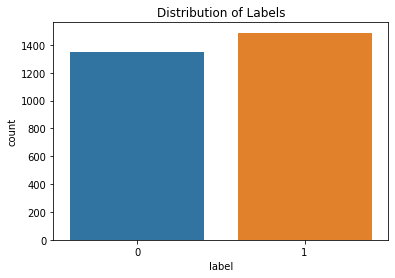

In [6]:
# Countplot for the 'label' variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df["label"])
plt.title('Distribution of Labels')
plt.show()



 We can observe balance in the dataset. In this case, it shows the distribution of different labels in the 'label' column, providing an overview of the target variable's composition.

### Pairplot for numerical variables:

The pairplot allows us to visualize relationships between pairs of labels and others variable.

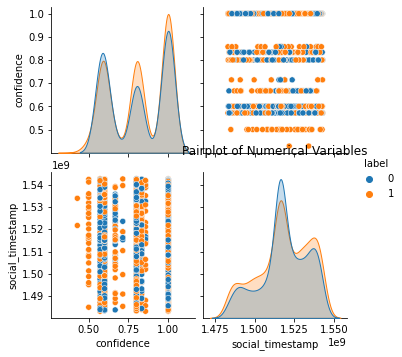

In [7]:
# Pairplot for numerical variables
sns.pairplot(df, hue='label')
plt.title('Pairplot of Numerical Variables')
plt.show()


By setting the hue as the 'label' variable, we can observe if there are any visible patterns or separations between different labels across multiple numerical features. This helps in understanding potential patterns or clusters in the data.

### Boxplot for 'confidence' across different labels:

The pairplot allows us to visualize relationships between pairs of numerical variables.

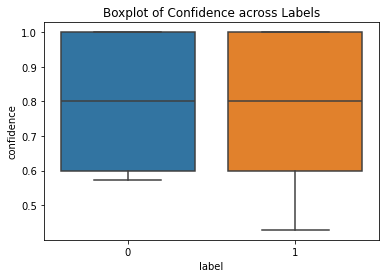

In [8]:
# Boxplot for 'confidence' across different labels
sns.boxplot(x='label', y='confidence', data=df)
plt.title('Boxplot of Confidence across Labels')
plt.show()


By setting the hue as the 'label' variable, we can observe if there are any visible patterns or separations between different labels across multiple numerical features. This helps in understanding potential patterns or clusters in the data.

### Correlation matrix visualization:

The correlation matrix helps us understand the linear relationships between numerical variables

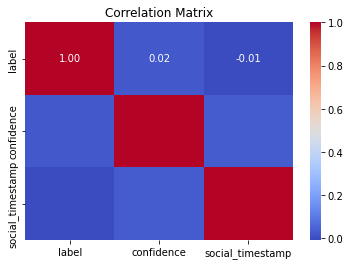

In [9]:
# Correlation matrix visualization
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

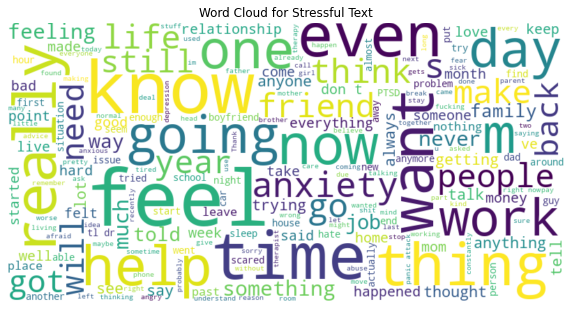

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Word Cloud for Stressful Text
stressful_text = ' '.join(df[df['label'] == 1]['text'])
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(stressful_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Stressful Text')
plt.show()



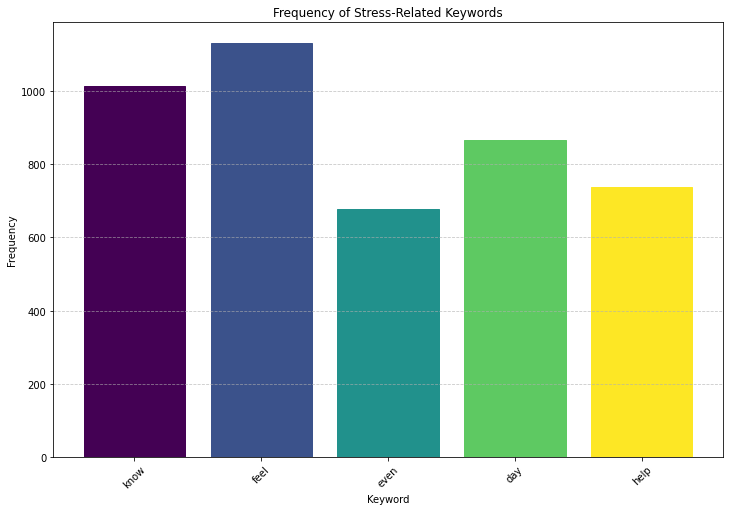

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list of stress-related keywords named 'stress_keywords'
stress_keywords = ['know', 'feel', 'even', 'day', 'help']

# Calculate keyword frequencies
keyword_counts = {keyword: df['text'].str.count(keyword).sum() for keyword in stress_keywords}

# Create a 2D bar plot with gradient colors
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(keyword_counts.keys(), keyword_counts.values(), color=plt.cm.viridis(np.linspace(0, 1, len(stress_keywords))))

# Add color gradient to the bars
for bar, color in zip(bars, plt.cm.viridis(np.linspace(0, 1, len(stress_keywords)))):
    bar.set_color(color)

# Style the plot
ax.set_title('Frequency of Stress-Related Keywords')
ax.set_xlabel('Keyword')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


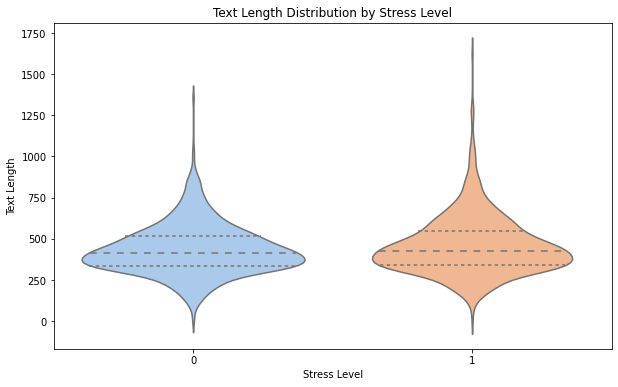

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
text_length = df['text_length'] = df['text'].apply(len)

# Length of Text vs. Stress Level (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='text_length', data=df, palette='pastel', inner='quartile')
plt.title('Text Length Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Text Length')
plt.show()


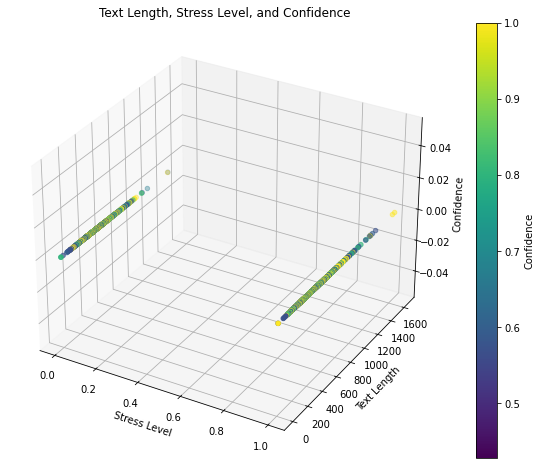

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Calculate text length and create 'text_length' column
df['text_length'] = df['text'].apply(len)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['label'], df['text_length'], c=df['confidence'], cmap='viridis', s=20)

ax.set_title('Text Length, Stress Level, and Confidence')
ax.set_xlabel('Stress Level')
ax.set_ylabel('Text Length')
ax.set_zlabel('Confidence')

# Add a colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Confidence')

plt.show()


We can see 0 correlation, lets focus on text message and labels : 0=no stress / 1=stress

We focus Us on text for our X and label for y

Feature Selection

In [14]:
not_used_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
df1 = df.drop(not_used_cols,axis=1)
df1.sample(3)

,text,label,text_length
137,I'm just scared to death. I have anxiety probl...,1,367
362,7) what if there arent enough houses for all t...,1,456
179,"Normally, my anxiety is very well controlled. ...",0,673


In [17]:
df1['label'].unique()

#Text processing
#importing required libraries (nltk,spacy,urllib,re etc.)
#downloading required database (omw), wordnet, punkt, stopwords
#cleaning data (with regualr expression)
import nltk
import re
from urllib.parse import urlparse
#from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database 
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Initialize stopword

In [18]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Cleaning text data

#### Text Preprocessing

I created the textPocess function to clean text entirely. 
It removes brackets, URLs, escape characters, HTML tags, and non-alphanumeric characters, converts text to lowercase, tokenizes it, removes stopwords (with a minor issue), and lemmatizes words. It also includes basic error handling.

In [19]:
# Convert text to lowercase
df1["text"] = df1["text"].str.lower()
df1.sample(3)

,text,label,text_length
5,i think he doesn't want to put in the effort f...,1,539
832,perhaps as a result i feel awful about wanting...,1,640
930,"but there is no certainty, and i am so scared ...",1,443


In [20]:
import string

# Define a function to remove punctuation
def remove_punctuation(text: str) -> str:
    translation_table = str.maketrans('', '', string.punctuation)
    return text.translate(translation_table)

# Apply the function to the text
df1["text_wo_punct"] = df1["text"].apply(remove_punctuation)
df1.sample(3)

,text,label,text_length,text_wo_punct
2092,"hello, you are invited to complete a survey fo...",0,853,hello you are invited to complete a survey for...
1414,"that was easy, i was probably anxious about my...",1,537,that was easy i was probably anxious about my ...
2439,my friend is coming to get me in the grocery s...,1,427,my friend is coming to get me in the grocery s...


In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text: str) -> str:
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    return ' '.join(filtered_words)

# Apply the function to the text
df1["text_wo_stop"] = df1["text_wo_punct"].apply(remove_stopwords)
df1.sample(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,text_length,text_wo_punct,text_wo_stop
15,i asked him three time what happened. and afte...,1,369,i asked him three time what happened and after...,asked three time happened third time cried wen...
1001,i was working on this so hard and spent all of...,1,532,i was working on this so hard and spent all of...,working hard spent money failed driving test i...
1213,"broken bones, concussion. he broke my glasses ...",1,300,broken bones concussion he broke my glasses in...,broken bones concussion broke glasses half des...


In [22]:
from collections import Counter

# Count word frequencies
text_join = " ".join(df1["text_wo_stop"])
text_split = text_join.split()
text_split = [word for word in text_split if word.strip()]
count_words = Counter(text_split)
most_common = count_words.most_common()

# Define a function to remove frequent words
FREQWORDS = [w for (w, word_count) in most_common[:10]]

def remove_freqwords(text: str, freq_words: list=FREQWORDS) -> str:
    text_removed = " ".join([word for word in text.split(" ") if word not in freq_words])
    return text_removed

# Apply the function to the text
df1["text_wo_stopfreq"] = df1["text_wo_stop"].apply(remove_freqwords)
df1.sample(3)

,text,label,text_length,text_wo_punct,text_wo_stop,text_wo_stopfreq
1599,i loved her and i was completely broken. in ju...,1,442,i loved her and i was completely broken in jul...,loved completely broken july 2016 went gaming ...,loved completely broken july 2016 went gaming ...
2100,edit 2: this thread got so much more attention...,0,566,edit 2 this thread got so much more attention ...,edit 2 thread got much attention could imagine...,edit 2 thread got much attention could imagine...
1139,"is it also possible that since i was so young,...",1,425,is it also possible that since i was so young ...,also possible since young mind distorted hid m...,also possible since young mind distorted hid m...


In [23]:
# Define a function to remove rare words
RAREWORDS = [w for (w, word_count) in most_common[-10:]]

def remove_rarewords(text: str, rare_words: list=RAREWORDS) -> str:
    text_removed = " ".join([word for word in text.split(" ") if word not in rare_words])
    return text_removed

# Apply the function to the text
df1["text_wo_stopfreqrare"] = df1["text_wo_stopfreq"].apply(remove_rarewords)
df1.sample(3)

,text,label,text_length,text_wo_punct,text_wo_stop,text_wo_stopfreq,text_wo_stopfreqrare
401,now that he needs financial help he knows exac...,0,413,now that he needs financial help he knows exac...,needs financial help knows exactly find know w...,needs financial help knows exactly find wants ...,needs financial help knows exactly find wants ...
1453,"however, he seems to have quite few girl-frien...",0,533,however he seems to have quite few girlfriends...,however seems quite girlfriends friendly exten...,however seems quite girlfriends friendly exten...,however seems quite girlfriends friendly exten...
1415,i endured months and months of all types of ab...,1,472,i endured months and months of all types of ab...,endured months months types abuse final time g...,endured months months types abuse final grabbe...,endured months months types abuse final grabbe...


In [24]:
from itertools import chain

TO_REMOVE = list(chain(STOPWORDS, FREQWORDS, RAREWORDS))


In [25]:
# Define a function to filter out words
#def filter_text(text: str, words_to_remove: list = TO_REMOVE) -> str:
#    text_filtered = " ".join([word for word in text.split(" ") if word not in words_to_remove])
#    return text_filtered
#
# Apply the function to the text
#df1["processed_text"] = df1["text"].apply(filter_text)
#df1 = df1[['text', 'processed_text']]
#df1.sample(3)

Then I construct my pipeline

In [26]:
def textProcess(sent):
    try:
        # Replace square brackets, parentheses with spaces
        sent = re.sub('[][)(]', ' ', sent)

        # Remove URLs by checking if a word has a URL scheme
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # Remove escape characters starting with '@'
        sent = re.sub(r'\@\w+', '', sent)

        # Remove HTML tags using regular expressions
        sent = re.sub(re.compile("<.*?>"), '', sent)

        # Keep only letters and numbers, replace others with spaces
        sent = re.sub("[^A-Za-z0-9]", ' ', sent)

        # Convert all words to lowercase
        sent = sent.lower()

        # Strip extra spaces from words and sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # Tokenize the text into words
        tokens = word_tokenize(sent)
        
        # Remove stopwords (common words that don't carry much meaning)
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words (convert words to their base form)
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)

        return sent

    except Exception as ex:
        # Handle exceptions and print an error message
        print(sent, "\n")
        print("Error ", ex)


Test and View

In [27]:
df1['processed_text'] = df1['text'].apply(lambda text: textProcess(text))
df1.sample(3)

,text,label,text_length,text_wo_punct,text_wo_stop,text_wo_stopfreq,text_wo_stopfreqrare,processed_text
1040,their system is similar to lego - a one family...,0,614,their system is similar to lego a one family ...,system similar lego one family house could bui...,system similar lego one family house could bui...,system similar lego one family house could bui...,system similar lego one family house could bui...
676,and i really don't know what to do. this isn't...,1,406,and i really dont know what to do this isnt ne...,really dont know isnt nearly first time lied a...,isnt nearly first lied also things unemployed ...,isnt nearly first lied also things unemployed ...,really know nearly first time lied also thing ...
692,essentially they had a few speakers which ran ...,0,562,essentially they had a few speakers which ran ...,essentially speakers ran people organization m...,essentially speakers ran people organization m...,essentially speakers ran people organization m...,essentially speaker ran people organization ma...


In [28]:
print("without process ----> ",df1['text'].iloc[23],end='\n\n')
print("after process ----> ",df1['processed_text'].iloc[23])

without process ---->  with a switch blade and open arms in a sweater vest that covers a ragged undershirt stained with my innocence through faces that are never the same as the ones i dread finding in the crowd in the night, i rediscover my love of mares and how hoarse i can be in the morning it's the taste of blood but i am not bleeding

after process ---->  switch blade open arm sweater vest cover ragged undershirt stained innocence face never one dread finding crowd night rediscover love mare hoarse morning taste blood bleeding


# Vizualisaton

In [29]:
# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

1. Class Distribution:

This bar chart gives us an initial look at our data. 
It's essential for me to understand the balance between stress and non-stress messages. 
We can see that there are more stress messages (represented by the green bars) than stress Non-Stress messages (the light green bars). 

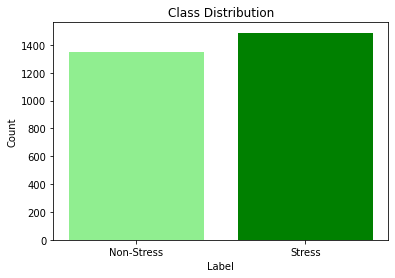

In [30]:
# Calculate class distribution
class_counts = df1['label'].value_counts()
# Create a bar chart to visualize the class distribution in green
plt.bar(class_counts.index, class_counts.values, color=['green', 'lightgreen'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Stress', 'Stress'])
plt.title('Class Distribution')
plt.show()


2.Text Length Distribution:

I make a histogram for text message lengths is quite revealing.
By looking at this, I can quickly get a sense of how long the messages in our dataset are.

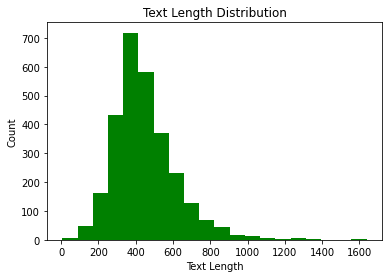

In [31]:
# Calculate text lengths
df1['text_lengths'] = df1['text'].apply(len)

# Calculate text lengths
df1['text_lengths'] = df1['text'].apply(len)

# Create a histogram to visualize the text length distribution in green
plt.hist(df1['text_lengths'], bins=20, color='green')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()


In [32]:
!pip install wordcloud


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

3. Word Cloud:

Word cloud serve us to visualize the most common words in the text and processed text with the 2 differents types of labels. 

It's like peeking into the most frequent terms people use when talking about stress. 

We can see that some words stand out more prominently. These are the terms that are used most frequently in our dataset. It's a quick way for me to grasp the most relevant words.

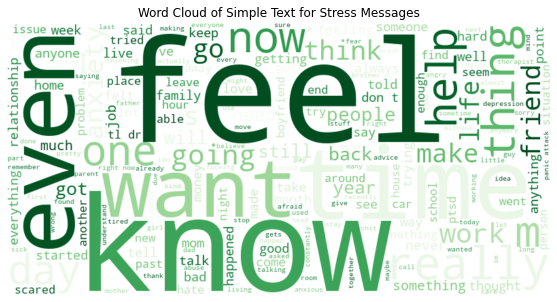

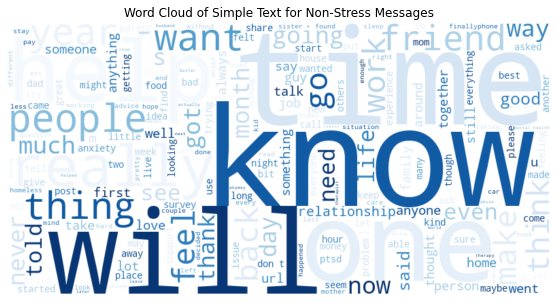

In [34]:
# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for stress messages (label=1) with green color
wordcloud_stress = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(df1[df1['label'] == 1]['text'].str.cat(sep=' '))

# Display the word cloud for stress messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Simple Text for Stress Messages')
plt.show()

# Generate a word cloud for non-stress messages (label=0) with blue color
wordcloud_non_stress = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(df1[df1['label'] == 0]['text'].str.cat(sep=' '))

# Display the word cloud for non-stress messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_stress, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Simple Text for Non-Stress Messages')
plt.show()


4. Bar Plot of Top N Words: 

To visualize the most frequently occurring words in your dataset.

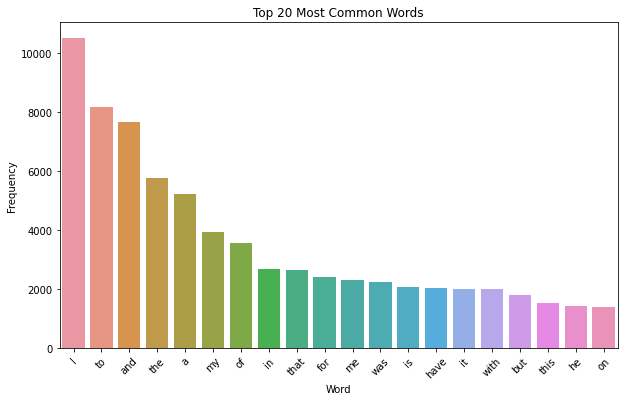

In [35]:
from collections import Counter
import seaborn as sns

word_counter = Counter(" ".join(df['text']).split())
most_common_words = word_counter.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[w[0] for w in most_common_words], y=[w[1] for w in most_common_words])
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


In [36]:
df1['text_lengths'] = df1['text'].apply(len)


In [37]:
df1['word_count'] = df1['text'].apply(lambda x: len(str(x).split()))


In [38]:
df1['avg_word_length'] = df1['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))


C:\Users\nicol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


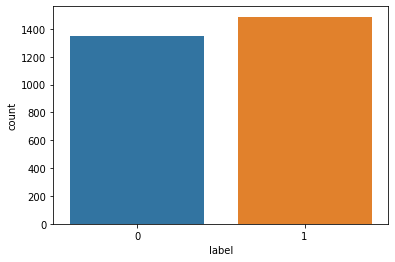

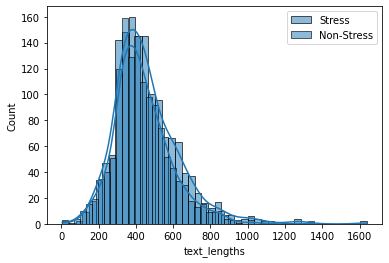

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of labels
sns.countplot(df1['label'])
plt.show()

# Compare the distribution of text lengths for stress and non-stress messages
sns.histplot(df1[df1['label'] == 1]['text_lengths'], label='Stress', kde=True)
sns.histplot(df1[df1['label'] == 0]['text_lengths'], label='Non-Stress', kde=True)
plt.legend()
plt.show()


# Conclusion - Part 1: Exploration of Stress.csv

In this initial phase of our project, we delved into the exploration of the Stress.csv dataset, seeking valuable insights into the complex dynamics of stress. The dataset offers a rich tapestry of information, capturing diverse factors that contribute to stress levels in individuals.



## Importance of Text Data

One standout feature of the dataset is the inclusion of textual data, providing a qualitative dimension to our exploration. Textual information, such as comments, narratives, or descriptions, offers a nuanced perspective on stress triggers and coping mechanisms. 

Recognizing the significance of this textual data, our exploration involved thorough text processing techniques. Processing text not only enables us to derive meaningful patterns but also plays a crucial role in reducing bias inherent.

## Focus on the Label - Stress Levels

Our primary focus remains on the label 

- **stress levels (label):** 
As we transition from exploration to the machine learning phase, the label becomes the key variable around which our predictive models will revolve. 


## Next Steps

The interplay between text data and stress labels will continue to be a focal point.

As we advance, the goal remains steadfast - to develop a predictive model that not only performs well in terms of accuracy but also contributes meaningfully to the understanding and mitigation of stress in diverse contexts.


Nicolas WATTENHOFFER